In [12]:
import warnings
warnings.filterwarnings("ignore")
import os
os.environ["PYTHONWARNINGS"] = "ignore"

import pandas as pd

# Load dataset from local system
file_path = "online_retail_II.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f" File not found: {file_path}")

df = pd.read_csv(file_path, encoding="latin1")

print("Dataset loaded successfully!")
print(df.head())
print(df.info())
print("Columns in dataset:")
print(df.columns.tolist())

Dataset loaded successfully!
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       ----------

In [14]:
# Clean dataset
df = df.dropna(subset=['Invoice', 'StockCode', 'Description'])
df = df[df['Quantity'] > 0]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

print("Data cleaned successfully!")
print(f"Number of rows after cleaning: {len(df)}")

print("\nSample data:")
print(df.head())

Data cleaned successfully!
Number of rows after cleaning: 1042728

Sample data:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [16]:
# Count most frequently purchased items
item_counts = df['Description'].value_counts()

# Reduce items to avoid RAM crash
top_items = item_counts.head(500).index

df_small = df[df['Description'].isin(top_items)]

# Rebuild transactions
transactions = df_small.groupby('Invoice')['Description'].apply(list)
transactions = transactions.reset_index(name='items')

transactions.head()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,Invoice,items
0,489434,"[15CM CHRISTMAS GLASS BALL 20 LIGHTS, RECORD F..."
1,489436,"[LOVE BUILDING BLOCK WORD, HOME BUILDING BLOCK..."
2,489437,"[RETRO COFFEE MUGS ASSORTED, PACK OF 20 SKULL ..."
3,489438,"[DINOSAURS WRITING SET , JUMBO BAG CHARLIE AN..."
4,489439,"[BAKING SET 9 PIECE RETROSPOT , RETRO SPOT TEA..."


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [17]:
# Count most frequently purchased items
item_counts = df['Description'].value_counts()

# Reduce to avoid RAM crash (500 is safe; you can lower to 300)
top_items = item_counts.head(500).index

# Reduced dataset
df_small = df[df['Description'].isin(top_items)]

# Build transactions (each invoice = list of items)
transactions = df_small.groupby('Invoice')['Description'].apply(list)
transactions = transactions.reset_index(name='items')

transactions.head()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,Invoice,items
0,489434,"[15CM CHRISTMAS GLASS BALL 20 LIGHTS, RECORD F..."
1,489436,"[LOVE BUILDING BLOCK WORD, HOME BUILDING BLOCK..."
2,489437,"[RETRO COFFEE MUGS ASSORTED, PACK OF 20 SKULL ..."
3,489438,"[DINOSAURS WRITING SET , JUMBO BAG CHARLIE AN..."
4,489439,"[BAKING SET 9 PIECE RETROSPOT , RETRO SPOT TEA..."


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [18]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions['items']).transform(transactions['items'])
basket = pd.DataFrame(te_ary, columns=te.columns_)

basket.head()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,SET 2 TEA TOWELS I LOVE LONDON,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,15CM CHRISTMAS GLASS BALL 20 LIGHTS,20 DOLLY PEGS RETROSPOT,3 HEARTS HANGING DECORATION RUSTIC,...,WOODEN SCHOOL COLOURING SET,WOODEN STAR CHRISTMAS SCANDINAVIAN,WOODEN TREE CHRISTMAS SCANDINAVIAN,WOODEN UNION JACK BUNTING,WOODLAND CHARLOTTE BAG,WORLD WAR 2 GLIDERS ASSTD DESIGNS,YOU'RE CONFUSING ME METAL SIGN,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [20]:
# Hide all warnings and Jupyter noise
import warnings
warnings.filterwarnings("ignore")

import logging
logging.getLogger("asyncio").setLevel(logging.CRITICAL)
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)
logging.getLogger("jupyter_client").setLevel(logging.CRITICAL)

from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Apriori Function
def run_apriori(min_sup, min_conf):
    freq = apriori(basket, min_support=min_sup, use_colnames=True, low_memory=True)
    rules = association_rules(freq, metric="confidence", min_threshold=min_conf)
    rules = rules.sort_values("lift", ascending=False)
    return freq, rules

# Parameter Set A (Strict)
support, confidence = 0.05, 0.6
fis, rules = run_apriori(support, confidence)

print(f"Parameter Set A: Support={support}, Confidence={confidence} ")
print(f"Frequent Itemsets found: {len(fis)}")
print(f"Association Rules found: {len(rules)}\n")

if not rules.empty:
    print("Top 5 Rules (sorted by lift):")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))
else:
    print("No rules found for this parameter set.")

rules.to_csv("apriori_rules_setA.csv", index=False)
fis.to_csv("frequent_itemsets_setA.csv", index=False)


Parameter Set A: Support=0.05, Confidence=0.6 
Frequent Itemsets found: 27
Association Rules found: 0

No rules found for this parameter set.


In [21]:
import warnings
warnings.filterwarnings("ignore")

import logging
logging.getLogger("asyncio").setLevel(logging.CRITICAL)
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)
logging.getLogger("jupyter_client").setLevel(logging.CRITICAL)
# Parameter Set B (Balanced)
support, confidence = 0.02, 0.5
fis, rules = run_apriori(support, confidence)

print(f"Parameter Set B: Support={support}, Confidence={confidence} ")
print(f"Frequent Itemsets found: {len(fis)}")
print(f"Association Rules found: {len(rules)}\n")

if not rules.empty:
    print("Top 5 Rules (sorted by lift):")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))
else:
    print("No rules found for this parameter set.")

rules.to_csv("apriori_rules_setB.csv", index=False)
fis.to_csv("frequent_itemsets_setB.csv", index=False)


Parameter Set B: Support=0.02, Confidence=0.5 
Frequent Itemsets found: 317
Association Rules found: 19

Top 5 Rules (sorted by lift):
                           antecedents                         consequents  \
4     (PINK REGENCY TEACUP AND SAUCER)   (GREEN REGENCY TEACUP AND SAUCER)   
5    (GREEN REGENCY TEACUP AND SAUCER)    (PINK REGENCY TEACUP AND SAUCER)   
13  (ROSES REGENCY TEACUP AND SAUCER )    (PINK REGENCY TEACUP AND SAUCER)   
12    (PINK REGENCY TEACUP AND SAUCER)  (ROSES REGENCY TEACUP AND SAUCER )   
7   (ROSES REGENCY TEACUP AND SAUCER )   (GREEN REGENCY TEACUP AND SAUCER)   

     support  confidence       lift  
4   0.023193    0.834146  22.896479  
5   0.023193    0.636634  22.896479  
13  0.021837    0.570517  20.518587  
12  0.021837    0.785366  20.518587  
7   0.027778    0.725726  19.920461  


In [22]:
import warnings
warnings.filterwarnings("ignore")

import logging
logging.getLogger("asyncio").setLevel(logging.CRITICAL)
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)
logging.getLogger("jupyter_client").setLevel(logging.CRITICAL)
# Parameter Set C (Lenient)
support, confidence = 0.01, 0.3
fis, rules = run_apriori(support, confidence)

print(f"Parameter Set C: Support={support}, Confidence={confidence} ")
print(f"Frequent Itemsets found: {len(fis)}")
print(f"Association Rules found: {len(rules)}\n")

if not rules.empty:
    print("Top 5 Rules (sorted by lift):")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))
else:
    print("No rules found for this parameter set.")

rules.to_csv("apriori_rules_setC.csv", index=False)
fis.to_csv("frequent_itemsets_setC.csv", index=False)


Parameter Set C: Support=0.01, Confidence=0.3 
Frequent Itemsets found: 1006
Association Rules found: 667

Top 5 Rules (sorted by lift):
                                           antecedents  \
645                    (POPPY'S PLAYHOUSE LIVINGROOM )   
644  (POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...   
642  (POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...   
647                       (POPPY'S PLAYHOUSE BEDROOM )   
643  (POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...   

                                           consequents   support  confidence  \
645  (POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...  0.011095    0.725177   
644                    (POPPY'S PLAYHOUSE LIVINGROOM )  0.011095    0.734291   
642                       (POPPY'S PLAYHOUSE BEDROOM )  0.011095    0.862869   
647  (POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...  0.011095    0.581792   
643                        (POPPY'S PLAYHOUSE KITCHEN)  0.011095    0.887202   

          lift  
645  47.994499  

In [23]:
# Limit to top 200 items to reduce complexity
top_items = df['Description'].value_counts().head(200).index
df_seq = df[df['Description'].isin(top_items)]

# Sort by time (sequence order)
df_seq = df_seq.sort_values(['Customer ID', 'InvoiceDate'])

# Limit each customer to first 20 events
sequences = df_seq.groupby('Customer ID')['Description'].apply(lambda x: list(x)[:20])
sequences = list(sequences)

print("Total sequences:", len(sequences))
print("Example sequence:", sequences[0][:10])


Total sequences: 5541
Example sequence: ['EDWARDIAN PARASOL NATURAL', 'EDWARDIAN PARASOL BLACK', 'DOORMAT UNION FLAG']


<Axes: ylabel='Description'>

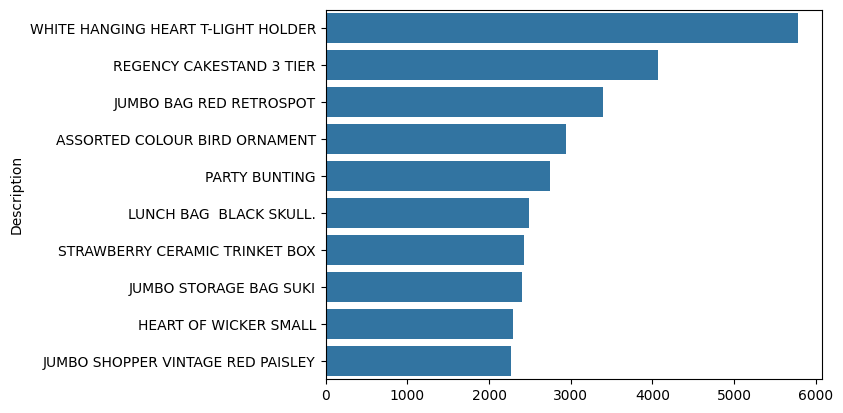

In [24]:
# scikit-learn preprocessing (discretize an example numeric column)
from sklearn.preprocessing import KBinsDiscretizer
import seaborn as sns

# convert InvoiceDate -> hour-of-day categorical example (if you want numeric->categorical)
df['Hour'] = df['InvoiceDate'].dt.hour.fillna(0).astype(int)
kbd = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile')
df['Hour_bin'] = kbd.fit_transform(df[['Hour']]).astype(int).ravel()

# short seaborn plot (distribution of top items)
top10 = df['Description'].value_counts().head(10)
sns.barplot(x=top10.values, y=top10.index)


In [25]:
# Robustness test: sample multiple times with different seeds and compute rule counts
from mlxtend.frequent_patterns import fpgrowth, association_rules
import numpy as np

def experiment_on_sample(seed, frac=0.5, support=0.02, conf=0.5):
    samp = transactions.sample(frac=frac, random_state=seed)  # transactions is the invoice->items df
    te = TransactionEncoder()
    te_ary = te.fit_transform(samp['items'])
    samp_basket = pd.DataFrame(te_ary, columns=te.columns_)
    freq = fpgrowth(samp_basket, min_support=support, use_colnames=True)
    rules = association_rules(freq, metric="confidence", min_threshold=conf)
    return len(freq), len(rules), rules['lift'].mean() if not rules.empty else np.nan

seeds = [0, 7, 42, 123]
robust_results = []
for sd in seeds:
    nf, nr, mean_lift = experiment_on_sample(sd, frac=0.5, support=0.02, conf=0.5)
    robust_results.append({'seed': sd, 'itemsets': nf, 'rules': nr, 'mean_lift': mean_lift})
robust_df = pd.DataFrame(robust_results)
print("Robustness results across seeds:")
print(robust_df)


Robustness results across seeds:
   seed  itemsets  rules  mean_lift
0     0       312     19  14.361603
1     7       319     20  14.416897
2    42       333     23  13.431698
3   123       317     25  13.000786


In [26]:
# Parameter summary across your three sets
param_sets = [(0.05,0.6),(0.02,0.5),(0.01,0.3)]
summary_rows = []
for s,c in param_sets:
    freq = fpgrowth(basket, min_support=s, use_colnames=True)
    rules = association_rules(freq, metric="confidence", min_threshold=c)
    summary_rows.append({
        'support': s,
        'confidence': c,
        'num_itemsets': len(freq),
        'num_rules': len(rules),
        'avg_lift': rules['lift'].mean() if not rules.empty else None,
        'avg_confidence': rules['confidence'].mean() if not rules.empty else None
    })
summary_df = pd.DataFrame(summary_rows)
print("\Parameter comparison:")
print(summary_df)

# simple textual recommendation
best = summary_df.sort_values(['num_rules','avg_lift'], ascending=[False, False]).iloc[0]
print(f"Recommendation: support={best['support']}, conf={best['confidence']} is a good balance "
      f"({int(best['num_rules'])} rules, avg_lift={best['avg_lift']:.2f})")



 Parameter comparison:
   support  confidence  num_itemsets  num_rules   avg_lift  avg_confidence
0     0.05         0.6            27          0        NaN             NaN
1     0.02         0.5           317         19  14.694636        0.641407
2     0.01         0.3          1006        667  13.299908        0.473695

 Recommendation: support=0.01, conf=0.3 is a good balance (667 rules, avg_lift=13.30)


In [31]:
from prefixspan import PrefixSpan

def run_prefixspan_fast(min_support):
    ps = PrefixSpan(sequences)
    result = ps.frequent(min_support)
    # Sort by support descending
    return sorted(result, key=lambda x: x[0], reverse=True)

supports = [500, 200, 100]  # Fast experiments

for sup in supports:
    print(f"\n FAST PrefixSpan: min_support = {sup} ")
    patterns = run_prefixspan_fast(sup)
    print("Patterns found:", len(patterns))
    print("Top 10 patterns:")
    for p in patterns[:10]:
        print(p)



 FAST PrefixSpan: min_support = 500 
Patterns found: 13
Top 10 patterns:
(1249, ['WHITE HANGING HEART T-LIGHT HOLDER'])
(910, ['REGENCY CAKESTAND 3 TIER'])
(867, ['BAKING SET 9 PIECE RETROSPOT '])
(735, ['ASSORTED COLOUR BIRD ORNAMENT'])
(599, ['REX CASH+CARRY JUMBO SHOPPER'])
(561, ['60 TEATIME FAIRY CAKE CASES'])
(539, ['PARTY BUNTING'])
(536, ['VINTAGE SNAP CARDS'])
(533, ['NATURAL SLATE HEART CHALKBOARD '])
(529, ['PACK OF 72 RETRO SPOT CAKE CASES'])

 FAST PrefixSpan: min_support = 200 
Patterns found: 159
Top 10 patterns:
(1249, ['WHITE HANGING HEART T-LIGHT HOLDER'])
(910, ['REGENCY CAKESTAND 3 TIER'])
(867, ['BAKING SET 9 PIECE RETROSPOT '])
(735, ['ASSORTED COLOUR BIRD ORNAMENT'])
(599, ['REX CASH+CARRY JUMBO SHOPPER'])
(561, ['60 TEATIME FAIRY CAKE CASES'])
(539, ['PARTY BUNTING'])
(536, ['VINTAGE SNAP CARDS'])
(533, ['NATURAL SLATE HEART CHALKBOARD '])
(529, ['PACK OF 72 RETRO SPOT CAKE CASES'])

 FAST PrefixSpan: min_support = 100 
Patterns found: 297
Top 10 patterns:
(124

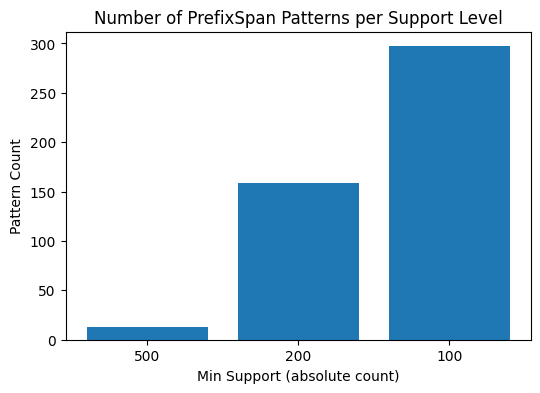

In [32]:
import matplotlib.pyplot as plt

# Collect pattern counts from optimized PrefixSpan run
pattern_counts = []

for sup in supports:  # supports = [500, 200, 100]
    patterns = run_prefixspan_fast(sup)
    pattern_counts.append(len(patterns))

plt.figure(figsize=(6,4))
plt.bar([str(s) for s in supports], pattern_counts)
plt.title("Number of PrefixSpan Patterns per Support Level")
plt.xlabel("Min Support (absolute count)")
plt.ylabel("Pattern Count")
plt.show()


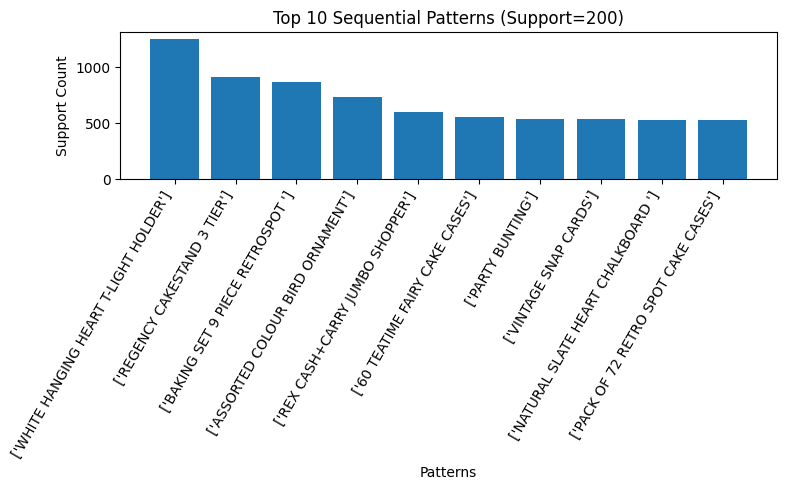

In [33]:
# Get patterns for support=200
patterns_200 = run_prefixspan_fast(200)

# Select top 10
top10 = patterns_200[:10]

supports_top10 = [p[0] for p in top10]   # support counts
patterns_labels = [str(p[1]) for p in top10]  # pattern sequences as strings

plt.figure(figsize=(8,5))
plt.bar(range(len(supports_top10)), supports_top10)
plt.xticks(range(len(supports_top10)), patterns_labels, rotation=60, ha='right')
plt.title("Top 10 Sequential Patterns (Support=200)")
plt.xlabel("Patterns")
plt.ylabel("Support Count")
plt.tight_layout()
plt.show()


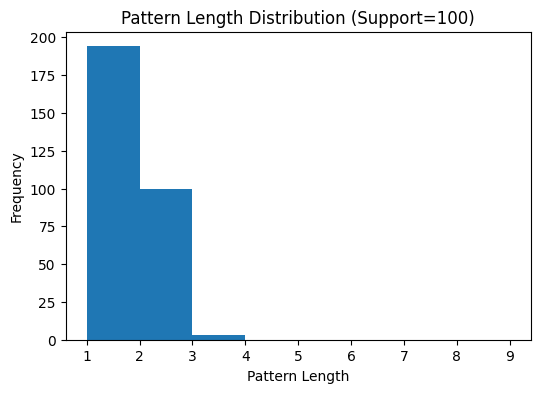

In [34]:
# Get patterns for support = 100
patterns_100 = run_prefixspan_fast(100)

# Calculate lengths of patterns
pattern_lengths = [len(p[1]) for p in patterns_100]

plt.figure(figsize=(6,4))
plt.hist(pattern_lengths, bins=range(1,10))
plt.title("Pattern Length Distribution (Support=100)")
plt.xlabel("Pattern Length")
plt.ylabel("Frequency")
plt.show()


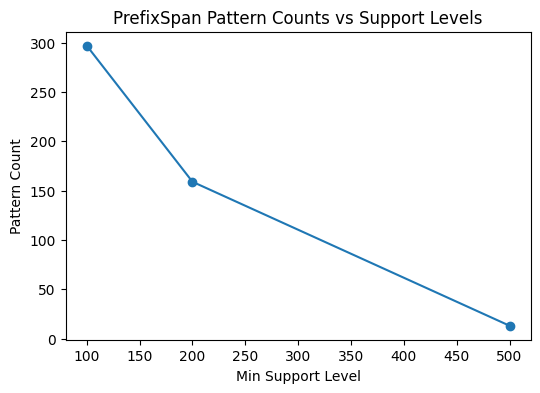

In [35]:
plt.figure(figsize=(6,4))
plt.plot(supports, pattern_counts, marker='o')
plt.title("PrefixSpan Pattern Counts vs Support Levels")
plt.xlabel("Min Support Level")
plt.ylabel("Pattern Count")
plt.show()
